# Notebook 1
## Exploração de Dados 2018/2019 
### Nelson Costa 42983
### Armando Sousa 76498

## Index
- [Task A - Pre Processing](#Task-A---Pre-Processing)
 - [Checking missing values](#Checking-if-datasets-have-missing-values)
 - [Handling categorical data](#Handling-categorical-data)
 - [Encoding class labels](#Encoding-class-labels)
 - [Partitioning datasets](#Partitioning-datasets-in-training-and-test-sets)
 - [Rank features](#Rank-features)
   - [Univariate Feature Selection](#1.-Univariate-Feature-Selection)
     - [1. Mutual Info Classif](#1.-Mutual-Info-Classif)
     - [2. Chi-squared](#2.-Chi-squared)
 - [Dimension reduction](#Dimension-reduction)
   - [Principal Component Analysis - Banknotes](#PCA---Banknotes-dataset)
   - [Kernel PCA - Banknotes](#KPCA---Banknotes-dataset)
   - [Principal Component Analysis - Nursery](#PCA---Nursery-dataset)
   - [Kernel PCA - Nursery](#KPCA---Nursery-dataset)
- [Task B - Predictive Model](#Task-B---Predictive-Model)
 - [Multilayer Perceptron - Banknotes dataset](#MLP---Banknotes-dataset)
 - [Support Vector Machine - Banknotes dataset](#SVM---Banknotes-dataset)
 - [Multilayer Perceptron - Nursery dataset](#MLP---Nursery-dataset)
 - [Support Vector Machine - Nursery dataset](#SVM---Nursery-dataset)

In [1]:
import pandas as pd
import numpy as np
import xlrd
import copy
%matplotlib inline

In [2]:
#Disable warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Reading datasets
Notebook 1 is divided into 3 parts: Pre processing and predictive model. The datasets used are 'Banknote Authentication Data Set' 
(https://archive.ics.uci.edu/ml/datasets/banknote+authentication) and 'Nursery Data Set' (https://archive.ics.uci.edu/ml/datasets/Nursery).

### Banknotes dataset

In [3]:
df_bankNotes = pd.read_excel('./data_banknote_authentication.xlsx')
#df_bankNotes

### Nursery dataset

In [4]:
df_nursery = pd.read_excel('./nursery.xlsx')
#df_nursery

# Task A - Pre Processing

## Checking if datasets have missing values

In this case none of the datasets have missing values,

### Banknotes dataset

In [5]:
df_bankNotes.isnull().sum()

variance of Wavelet Transformed image    0
skewness of Wavelet Transformed image    0
curtosis of Wavelet Transformed image    0
entropy of image                         0
class                                    0
dtype: int64

### Nursery dataset

In [6]:
df_nursery.isnull().sum()

parents     0
has_nurs    0
form        0
children    0
housing     0
finance     0
social      0
health      0
class       0
dtype: int64

## Handling categorical data

### Mapping ordinal features

#### Nursery dataset

In [7]:
# print features before mapping
#df_nursery[df_nursery.columns[0:8]]

In [8]:
# get dataset copy
df_nursery_copy = df_nursery.copy()

# cast data to string
df_nursery_copy = df_nursery_copy.astype(str)

# map features
parents_mapping = {'usual':1, 'pretentious':2, 'great_pret':3}
df_nursery_copy['parents'] = df_nursery_copy['parents'].map(parents_mapping)

has_nurs_mapping = {'proper':1, 'less_proper':2, 'improper':3, 'critical':4, 'very_crit':5}
df_nursery_copy['has_nurs'] = df_nursery_copy['has_nurs'].map(has_nurs_mapping)

form_mapping = {'complete':1, 'completed':2, 'incomplete':3, 'foster':4}
df_nursery_copy['form'] = df_nursery_copy['form'].map(form_mapping)

children_mapping = {'1':1, '2':2, '3':3, 'more':4}
df_nursery_copy['children'] = df_nursery_copy['children'].map(children_mapping)

housing_mapping = {'convenient':1, 'less_conv':2, 'critical':3}
df_nursery_copy['housing'] = df_nursery_copy['housing'].map(housing_mapping)

finance_mapping = {'convenient':1, 'inconv':2}
df_nursery_copy['finance'] = df_nursery_copy['finance'].map(finance_mapping)

social_mapping = {'nonprob':1, 'slightly_prob':2, 'problematic':3}
df_nursery_copy['social'] = df_nursery_copy['social'].map(social_mapping)

health_mapping = {'recommended':1, 'priority':2, 'not_recom':3}
df_nursery_copy['health'] = df_nursery_copy['health'].map(health_mapping)

In [9]:
# print features after mapping
df_nursery_copy[df_nursery_copy.columns[0:8]]

,parents,has_nurs,form,children,housing,finance,social,health
0,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,2
2,1,1,1,1,1,1,1,3
3,1,1,1,1,1,1,2,1
4,1,1,1,1,1,1,2,2
5,1,1,1,1,1,1,2,3
6,1,1,1,1,1,1,3,1
7,1,1,1,1,1,1,3,2
8,1,1,1,1,1,1,3,3
9,1,1,1,1,1,2,1,1


## Encoding class labels

### Nursery dataset

In [10]:
# print labels before encoding
#df_nursery_copy[df_nursery_copy.columns[8]]

In [11]:
class_mapping = {label:idx for idx,label in enumerate(np.unique(df_nursery_copy[df_nursery_copy.columns[8]]))}

class_mapping

{'not_recom': 0,
 'priority': 1,
 'recommend': 2,
 'spec_prior': 3,
 'very_recom': 4}

In [12]:
# map labels
df_nursery_copy[df_nursery_copy.columns[8]] = df_nursery_copy[df_nursery_copy.columns[8]].map(class_mapping)

In [13]:
# print labels after encoding
df_nursery_copy[df_nursery_copy.columns[8]]

0        2
1        1
2        0
3        2
4        1
5        0
6        1
7        1
8        0
9        4
10       1
11       0
12       4
13       1
14       0
15       1
16       1
17       0
18       4
19       1
20       0
21       4
22       1
23       0
24       1
25       1
26       0
27       4
28       1
29       0
        ..
12930    3
12931    3
12932    0
12933    3
12934    3
12935    0
12936    3
12937    3
12938    0
12939    3
12940    3
12941    0
12942    3
12943    3
12944    0
12945    3
12946    3
12947    0
12948    3
12949    3
12950    0
12951    3
12952    3
12953    0
12954    3
12955    3
12956    0
12957    3
12958    3
12959    0
Name: class, Length: 12960, dtype: int64

## Partitioning datasets in training and test sets

In [14]:
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

### Banknotes dataset

In [15]:
# labels reading
y1=df_bankNotes[df_bankNotes.columns[4]]
# features reading
X1=df_bankNotes[df_bankNotes.columns[0:4]]

# get training and test sets
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size = 0.3)

### Nursery dataset

In [16]:
# labels reading
y2=df_nursery_copy[df_nursery_copy.columns[8]]
# features reading
X2=df_nursery_copy[df_nursery_copy.columns[0:8]]

# get training and test sets
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size = 0.3)

## Rank features

### Univariate Feature Selection

Univariate feature selection selects the best features by running univariate statistical tests like **chi-squared test, F-1 test, and mutual information** methods.
Can't use the **chi-squared** function, if there are negative values.
#### 1. Mutual Info Classif

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

test = SelectKBest(score_func = mutual_info_classif, k=2)
test

SelectKBest(k=2, score_func=<function mutual_info_classif at 0x7f3162a480d0>)

##### Banknotes dataset

In [18]:
test.fit(X_train1, y_train1)
num_features = len(X_train1.columns)

scores = []
for i in range(num_features):
    score = test.scores_[i]
    scores.append((score, X_train1.columns[i]))
        
print (sorted(scores, reverse = True))

[(0.3651135027748482, 'variance of Wavelet Transformed image'), (0.23575549040416321, 'skewness of Wavelet Transformed image'), (0.12651335887606008, 'curtosis of Wavelet Transformed image'), (0.01604477828245643, 'entropy of image')]


##### Nursery dataset

In [19]:
test.fit(X_train2, y_train2)
num_features = len(X_train2.columns)

scores = []
for i in range(num_features):
    score = test.scores_[i]
    scores.append((score, X_train2.columns[i]))
        
print (sorted(scores, reverse = True))

[(0.6671626913475868, 'health'), (0.15002428064610718, 'has_nurs'), (0.049082432264722975, 'parents'), (0.019430268361006142, 'social'), (0.01479428914029901, 'housing'), (0.008336981751714045, 'form'), (0.008329247089529979, 'finance'), (0.0049258133024050466, 'children')]


#### 2. Chi-squared

In [20]:
from sklearn.feature_selection import chi2
test = SelectKBest(score_func = chi2, k=2)

##### Nursery dataset

In [21]:
test.fit(X_train2, y_train2)
num_features = len(X_train2.columns)

scores = []
for i in range(num_features):
    score = test.scores_[i]
    scores.append((score, X_train2.columns[i]))
        
print (sorted(scores, reverse = True))

[(2330.18746786419, 'health'), (1411.86832073306, 'has_nurs'), (277.77034581620404, 'parents'), (77.60311192178953, 'housing'), (65.42916585994789, 'children'), (54.447857258526255, 'social'), (31.315428926512134, 'form'), (8.674972717871512, 'finance')]


## Dimension reduction
### PCA - Banknotes dataset

Check to see the overall weight of each principal component has on the variance of values.

Explained variance ratio: [0.76650539 0.1412553  0.06298564 0.02925368]


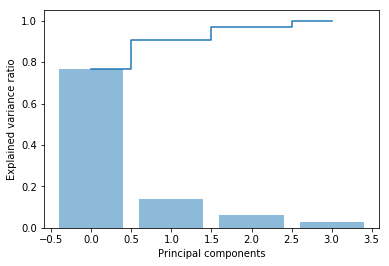

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()
principalComponents = pca.fit_transform(X_train1)

print("Explained variance ratio:",pca.explained_variance_ratio_)
range_value = pca.explained_variance_ratio_.shape[0]

plt.bar(range(range_value), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(range_value), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [23]:
# The eigenvectors
print('eigenvectors\n', pca.components_)
# singular values
print('singular_ values\n', pca.singular_values_)

eigenvectors
 [[-0.13990472 -0.81245605  0.54669634  0.14650921]
 [-0.78690389  0.26645552  0.31717771 -0.45736421]
 [ 0.45600508  0.44257498  0.77208222  0.00870563]
 [ 0.39149495 -0.27026657 -0.06641119 -0.87708451]]
singular_ values
 [222.008877    95.30487265  63.64048863  43.37135357]


Drawing graph using first 2 components.

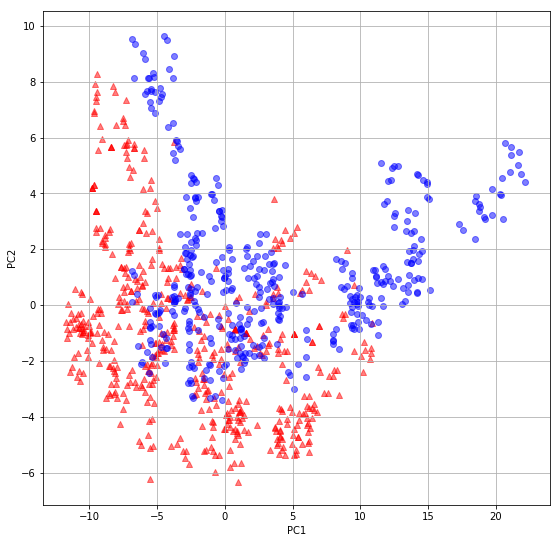

In [24]:
pca = PCA(n_components=2)
X_train_pca1 = pca.fit_transform(X_train1)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2,2,1) 

ax.scatter(X_train_pca1[y_train1 == 0, 0], X_train_pca1[y_train1 == 0, 1],
              color='red', marker='^', alpha=0.5)
ax.scatter(X_train_pca1[y_train1 == 1, 0], X_train_pca1[y_train1 == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.grid()
plt.show()

### KPCA - Banknotes dataset

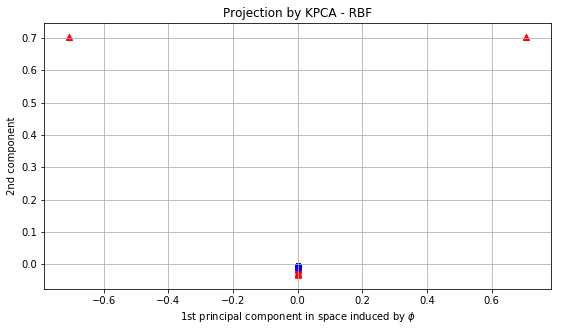

In [25]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA( n_components = 2, kernel="rbf", fit_inverse_transform=True, gamma=10)
X_train_kpca1 = kpca.fit_transform(X_train1)
fig = plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1, aspect='equal')

plt.scatter(X_train_kpca1[y_train1 == 0, 0], X_train_kpca1[y_train1 == 0, 1], c="red",
            marker='^', alpha=0.5)
plt.scatter(X_train_kpca1[y_train1 == 1, 0], X_train_kpca1[y_train1 == 1, 1], c="blue",
            marker='o', alpha=0.5)
plt.title("Projection by KPCA - RBF")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")
plt.grid()
plt.show()

### PCA - Nursery dataset
Unlike with the first dataset, the principal components here are much similar.

Explained variance ratio: [0.26999765 0.1687268  0.16783652 0.09156663 0.09001125 0.08938557
 0.08874903 0.03372655]


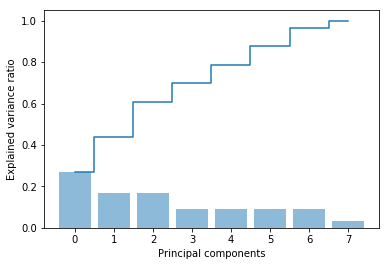

In [26]:
pca = PCA()
principalComponents = pca.fit_transform(X_train2)

print("Explained variance ratio:",pca.explained_variance_ratio_)
range_value = pca.explained_variance_ratio_.shape[0]

plt.bar(range(range_value), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(range_value), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [27]:
# The eigenvectors
print('eigenvectors\n', pca.components_)
# singular values
print('singular_ values\n', pca.singular_values_)

eigenvectors
 [[-9.47934855e-04  9.99987031e-01 -4.69267657e-04  3.15527592e-03
   2.19444550e-03 -1.12106606e-03  1.73251965e-03 -2.40617464e-03]
 [ 1.89466735e-02 -2.46758684e-03  4.68891697e-01  8.82783530e-01
  -1.41258805e-02  2.15045191e-04 -9.84467705e-03  1.31242379e-02]
 [-3.78226021e-03  1.87240217e-03  8.83135924e-01 -4.68854330e-01
   1.34920347e-02 -2.89003610e-04 -6.82737577e-03  1.13992559e-04]
 [ 4.12171541e-01 -2.90528484e-03  7.30183278e-04  1.25106793e-02
   6.20405745e-01  2.30800003e-03  2.21596985e-01 -6.29233892e-01]
 [-5.72602922e-01 -2.17018459e-03  1.06162531e-02  1.71697453e-02
   1.48186704e-01  7.86780525e-03  8.04181445e-01  5.46322414e-02]
 [ 1.18211569e-01  4.83622346e-04 -9.70306032e-03  1.85070171e-03
   6.80872099e-01 -4.55751871e-03 -8.98764082e-02  7.17107287e-01]
 [-6.98438277e-01 -1.27327421e-03 -1.97653752e-03  2.00943796e-02
   3.59389314e-01  6.65751874e-03 -5.44012446e-01 -2.94312958e-01]
 [-8.73680764e-03 -1.15666158e-03 -3.75980808e-05  6.11

Drawing a graph with the first 2 PCs doesn't show us much variance. There are a lot of points stacked on top of each other.

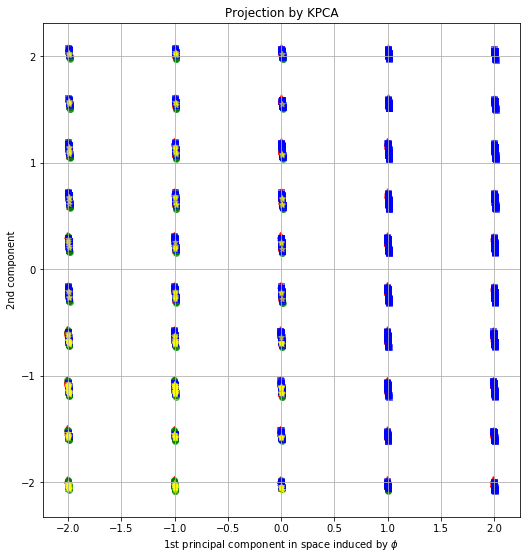

In [28]:
# Only two components for illustration
pca = PCA(n_components=7)
X_train_pca2 = pca.fit_transform(X_train2)

X_train2_v1 = pd.DataFrame(data=X_train_pca2)

fig= plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1, aspect='equal')

plt.scatter(X_train_pca2[y_train2 == 0, 0], X_train_pca2[y_train2 == 0, 1], c="red",
            marker='^', alpha=0.5)
plt.scatter(X_train_pca2[y_train2 == 1, 0], X_train_pca2[y_train2 == 1, 1], c="green",
            marker='o', alpha=0.5)
plt.scatter(X_train_pca2[y_train2 == 2, 0], X_train_pca2[y_train2 == 2, 1], c="cyan",
            marker='x', alpha=0.5)
plt.scatter(X_train_pca2[y_train2 == 3, 0], X_train_pca2[y_train2 == 3, 1], c="blue",
            marker='s', alpha=0.5)
plt.scatter(X_train_pca2[y_train2 == 4, 0], X_train_pca2[y_train2 == 4, 1], c="yellow",
            marker='*', alpha=0.5)
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")
plt.grid()
plt.show()

### KPCA - Nursery dataset

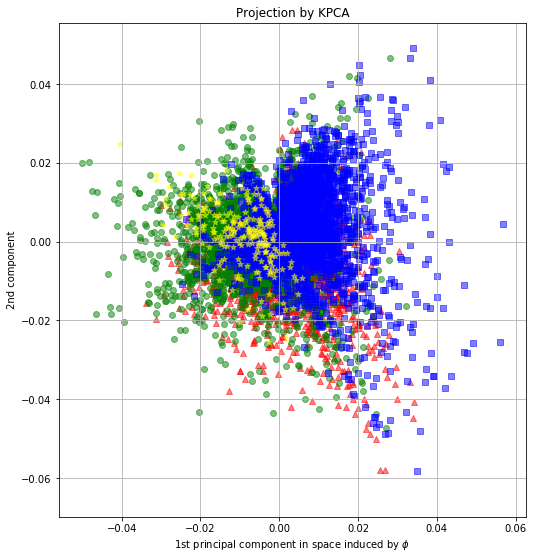

In [29]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components = 2 ,kernel="rbf", fit_inverse_transform=True, gamma=10)
X_train_kpca2 = kpca.fit_transform(X_train2)

fig= plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1, aspect='equal')

plt.scatter(X_train_kpca2[y_train2 == 0, 0], X_train_kpca2[y_train2 == 0, 1], c="red",
            marker='^', alpha=0.5)
plt.scatter(X_train_kpca2[y_train2 == 1, 0], X_train_kpca2[y_train2 == 1, 1], c="green",
            marker='o', alpha=0.5)
plt.scatter(X_train_kpca2[y_train2 == 2, 0], X_train_kpca2[y_train2 == 2, 1], c="cyan",
            marker='x', alpha=0.5)
plt.scatter(X_train_kpca2[y_train2 == 3, 0], X_train_kpca2[y_train2 == 3, 1], c="blue",
            marker='s', alpha=0.5)
plt.scatter(X_train_kpca2[y_train2 == 4, 0], X_train_kpca2[y_train2 == 4, 1], c="yellow",
            marker='*', alpha=0.5)
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")
plt.grid()
plt.show()


## Task B - Predictive Model

The models chosen were MLP and SVM.

In [30]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
# setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
            alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

### MLP - Banknotes dataset

In [31]:
from sklearn.neural_network import MLPClassifier

mlp_Dataset1 = MLPClassifier(activation='tanh', hidden_layer_sizes=(10,5), alpha=0.01, max_iter=5000)
mlp_Dataset1

MLPClassifier(activation='tanh', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


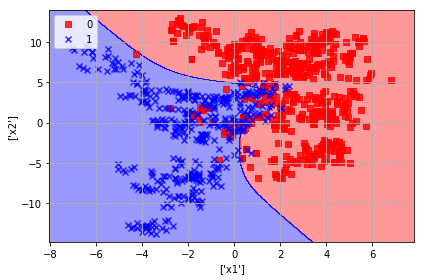

In [32]:
X12=X_train1[X_train1.columns[0:2]]

mlp_Dataset1 = mlp_Dataset1.fit(X12.values,y_train1.values)
plot_decision_regions(X12.values, y_train1.values, classifier=mlp_Dataset1)
plt.xlabel(['x1'])
plt.ylabel(['x2'])
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [33]:
print('Banknotes dataset')
print('the weights are \n',mlp_Dataset1.coefs_)
print('the bias \n ', mlp_Dataset1.intercepts_)
print('number of iterations \n', mlp_Dataset1.n_iter_)
print('output activation', mlp_Dataset1.out_activation_)

Banknotes dataset
the weights are 
 [array([[ 0.27912839, -0.44955468,  0.62629801, -0.17840014,  0.47476466,
        -0.21131811, -0.39922233,  0.38770192, -0.18936666, -0.14676214],
       [ 0.10251168, -0.69887619, -0.22839388, -0.08354042,  0.17291558,
        -0.0077546 , -0.15510242,  0.2198039 ,  0.28318979, -0.0833209 ]]), array([[ 0.50021791,  0.28354575,  0.52524301, -0.09777124,  0.3895508 ],
       [ 1.04568631, -0.40775077,  0.32993053,  0.56264259,  1.1146067 ],
       [ 0.57165465, -0.77688242,  1.00035204,  0.8872225 ,  0.13308413],
       [-0.49522631,  0.84165537, -0.29681432, -0.75865147, -0.82262961],
       [ 0.36526798, -0.75224419, -0.07284236,  0.39400805,  0.44518479],
       [-0.217362  , -0.14477429,  0.19645376, -0.16894034,  0.11305763],
       [-0.54110794, -0.11527716, -0.55744865, -0.76031779, -0.63174027],
       [-0.38152757, -0.53225613,  0.20481981,  0.30668199,  0.32003436],
       [ 0.81957294, -0.76918728,  0.90570855,  1.28662406,  0.37007535],
 

### MLP - Nursery dataset

In [34]:
mlp_Dataset2 = MLPClassifier(activation='tanh', hidden_layer_sizes=(10,5), alpha=0.01, max_iter=5000)
mlp_Dataset2

MLPClassifier(activation='tanh', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

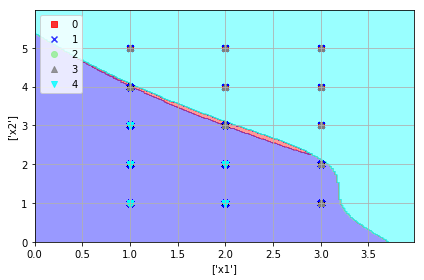

In [35]:
X22=X_train2[X_train2.columns[0:2]]
mlp_Dataset2 = mlp_Dataset2.fit(X22.values,y_train2.values)

plot_decision_regions(X22.values, y_train2.values, classifier=mlp_Dataset2)
plt.xlabel(['x1'])
plt.ylabel(['x2'])
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()


In [36]:
print('Nursery dataset')
print('the weights are \n',mlp_Dataset2.coefs_)
print('the bias \n ', mlp_Dataset2.intercepts_)
print('number of iterations \n', mlp_Dataset2.n_iter_)
print('output activation', mlp_Dataset2.out_activation_)

Nursery dataset
the weights are 
 [array([[ 0.39918774, -0.58851606,  0.56942324,  0.81525291,  0.39070391,
         0.11038901,  0.32118373,  0.52462088, -0.36008977,  0.11460914],
       [ 0.40757144, -0.7484958 ,  0.2405804 , -1.33827025,  0.45045278,
         0.39943511,  0.17918946,  0.53433873, -0.13137104, -0.47177555]]), array([[ 0.22309919, -0.73749193,  0.45534885, -0.51019626,  0.13228479],
       [ 0.73130393,  0.02766277, -0.64951006,  0.73388908, -0.21453857],
       [ 1.16428322,  0.22821304, -1.17696545, -0.26605887,  2.07651283],
       [ 0.00321566,  0.58106586,  0.29848459, -0.45905575,  1.37510809],
       [-0.37345229, -0.34376359, -0.35059715, -0.47162803, -0.31962718],
       [ 1.01285972,  0.09246268, -0.72704582,  0.11831987,  1.69289266],
       [ 0.57686872, -0.18012712, -1.10457792, -0.19109844,  0.92884311],
       [ 0.17955787, -0.49136034,  0.6717721 , -0.34667568, -0.12483113],
       [-0.39738367,  0.41683773,  0.44574193,  0.45189584, -0.78112884],
   

### SVM - Banknotes dataset

In [37]:
from sklearn.svm import SVC

svm_Dataset1=SVC(C=1.0,kernel='rbf', tol=1e-05, verbose=0)
#svm_Dataset1=SVC(C=1.0,kernel='rbf', max_iter=2000, tol=1e-05, verbose=0)

svm_Dataset1

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=1e-05, verbose=0)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


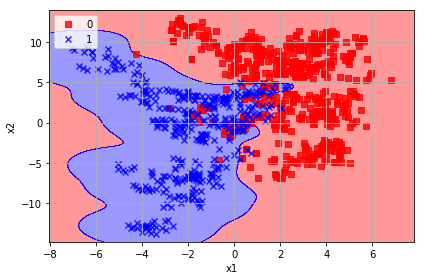

In [38]:
X12=X_train1[X_train1.columns[0:2]]

svm_Dataset1 = svm_Dataset1.fit(X12.values, y_train1.values)
plot_decision_regions(X12.values, y_train1.values, classifier=svm_Dataset1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [39]:
print('Banknotes dataset')
print('dual coef \n', svm_Dataset1.dual_coef_)
print ('support vectors \n', svm_Dataset1.support_vectors_)
print('index of support vectors \n ', svm_Dataset1.support_)
print ('bias', svm_Dataset1.intercept_)
print('the classifier \n', svm_Dataset1)

Banknotes dataset
dual coef 
 [[-1.00000000e+00 -2.56542151e-01 -1.00000000e+00 -1.00000000e+00
  -2.44640581e-01 -2.93953106e-01 -7.78827102e-01 -1.00000000e+00
  -1.00000000e+00 -6.61899850e-04 -3.19717089e-01 -1.00000000e+00
  -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -5.55779036e-02
  -1.00000000e+00 -9.68983664e-02 -1.00000000e+00 -4.50753209e-02
  -1.17662606e-01 -7.54783428e-02 -1.00000000e+00 -1.00000000e+00
  -2.16126231e-02 -1.00000000e+00 -1.00000000e+00 -4.73509741e-01
  -4.87760530e-01 -8.23227722e-01 -1.00000000e+00 -5.75946278e-01
  -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
  -1.00000000e+00 -5.08635095e-01 -1.00000000e+00 -1.00000000e+00
  -1.00000000e+00 -6.37617903e-01 -3.43756379e-01 -1.02373314e-01
  -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
  -2.90681697e-03 -5.10955042e-01 -1.00000000e+00 -1.00000000e+00
  -3.31906131e-01 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
  -2.49867603e-03 -1.39247088e-02 -1.00000000e

### SVM - Nursery dataset

In [40]:
svm_Dataset2=SVC(C=1.0,kernel='rbf', tol=1e-05, verbose=0)
#svm_Dataset2=SVC(C=1.0,kernel='rbf', max_iter=2000, tol=1e-05, verbose=0)
svm_Dataset2

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=1e-05, verbose=0)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

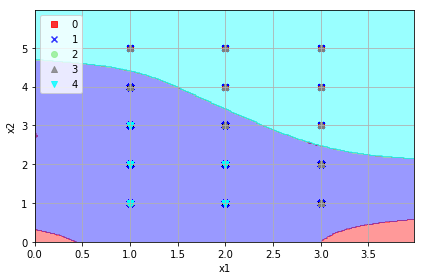

In [41]:
X22=X_train2[X_train2.columns[0:2]]

svm_Dataset2 = svm_Dataset2.fit(X22.values, y_train2.values)
plot_decision_regions(X22.values, y_train2.values, classifier=svm_Dataset2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [42]:
print('Nursery dataset')
print('dual coef \n', svm_Dataset2.dual_coef_)
print ('support vectors \n', svm_Dataset2.support_vectors_)
print('index of support vectors \n ', svm_Dataset2.support_)
print ('bias', svm_Dataset2.intercept_)
print('the classifier \n', svm_Dataset2)

Nursery dataset
dual coef 
 [[ 0.          0.          1.         ... -1.         -1.
  -1.        ]
 [ 0.          0.          0.         ... -1.         -1.
  -1.        ]
 [ 1.          1.          0.         ... -0.         -0.
  -0.        ]
 [ 0.          0.          0.         ... -0.47985772 -0.
  -1.        ]]
support vectors 
 [[3. 5.]
 [3. 4.]
 [2. 2.]
 ...
 [2. 2.]
 [1. 2.]
 [2. 1.]]
index of support vectors 
  [   0    4    6 ... 8924 9023 9030]
bias [ 0.06711158  1.          0.21637831  1.00000039  1.          0.21637859
  1.00000039 -0.59885101 -1.          0.48176958]
the classifier 
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=1e-05, verbose=0)
